# **Part B**

In [4]:
#import the libraries 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
#dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

In [17]:
# Create an ImageDataGenerator object 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, 
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
    )

In [18]:
datagen.fit(X_train)

Use Visualization libraries to see how data augmentation works.

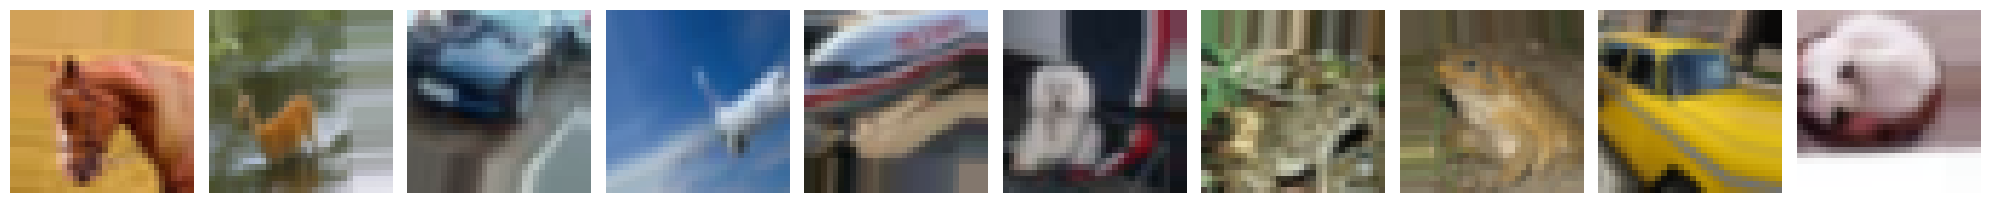

In [19]:
# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

augmented_images = [datagen.flow(X_train, batch_size=1).__next__()[0].astype('uint8') for i in range(10)]
plot_images(augmented_images)


Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a custom CNN model
def create_custom_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the custom CNN model
custom_cnn_model = create_custom_cnn_model()
history_custom_cnn = custom_cnn_model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=20, validation_data=(X_test, Y_test))


Epoch 1/20


/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1669 - loss: 4.0568 - val_accuracy: 0.3315 - val_loss: 1.8371
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2690 - loss: 1.9408 - val_accuracy: 0.3741 - val_loss: 1.6882
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3196 - loss: 1.8375 - val_accuracy: 0.4048 - val_loss: 1.6241
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3522 - loss: 1.7674 - val_accuracy: 0.4588 - val_loss: 1.4668
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3802 - loss: 1.7047 - val_accuracy: 0.4699 - val_loss: 1.4404
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4087 - loss: 1.6518 - val_accuracy: 0.4890 - val_loss: 1.3990
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4221 - loss: 1.5983 - val_accuracy: 0.5060 - val_loss: 1.3511
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.4379 - loss: 1.5716 - val_accurac

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the VGG16 model with pretrained weights and without the top layer

# Define the transfer learning model
def create_transfer_learning_model(): 
      base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

      model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]) 
      
      base_model.trainable = False

      model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
      return model

# Create and train the transfer learning model
transfer_learning_model = create_transfer_learning_model()
history_transfer_learning = transfer_learning_model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=5, validation_data=(X_test, Y_test))


Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.2434 - loss: 6.6114 - val_accuracy: 0.4357 - val_loss: 1.6355
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 92s 84ms/step - accuracy: 0.3408 - loss: 1.8793 - val_accuracy: 0.4920 - val_loss: 1.4667
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 91s 83ms/step - accuracy: 0.3823 - loss: 1.7362 - val_accuracy: 0.5149 - val_loss: 1.3839
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.4012 - loss: 1.6942 - val_accuracy: 0.5248 - val_loss: 1.3606
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 105s 96ms/step - accuracy: 0.4144 - loss: 1.6730 - val_accuracy: 0.5175 - val_loss: 1.3839


In [23]:
from sklearn.metrics import f1_score

# Evaluate the custom CNN model
Y_pred_custom_cnn = custom_cnn_model.predict(X_test)
Y_pred_custom_cnn_classes = Y_pred_custom_cnn.argmax(axis=1)
f1_score_custom_cnn = f1_score(Y_test, Y_pred_custom_cnn_classes, average='weighted')

#Evaluate the transfer learning model
Y_pred_transfer_learning = transfer_learning_model.predict(X_test)
Y_pred_transfer_learning_classes = Y_pred_transfer_learning.argmax(axis=1)
f1_score_transfer_learning = f1_score(Y_test, Y_pred_transfer_learning_classes, average='weighted')
 

print(f1_score_custom_cnn)  
print(f1_score_transfer_learning)
if f1_score_custom_cnn > f1_score_transfer_learning:
    print("The CNN model performed better.")
else:
    print("The transfer learning model with VGG16 performed better.")


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step
0.5970509569182338
0.5056472102363572
The CNN model performed better.
